# Simulate Random Walk 

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [51]:

# Parameters
np.random.seed(43)  # For reproducibility
n_steps = 1000  # Number of steps in the random walk

# Generate random walk without drift
steps_without_drift = np.random.normal(loc=0, scale=1, size=n_steps)
random_walk_without_drift = np.cumsum(steps_without_drift)



In [57]:
# Generate random walk with drift
drift = 0.1  # Drift value
steps_with_drift = np.random.normal(loc=0, scale=1, size=n_steps) + drift
random_walk_with_drift = np.cumsum(steps_with_drift)



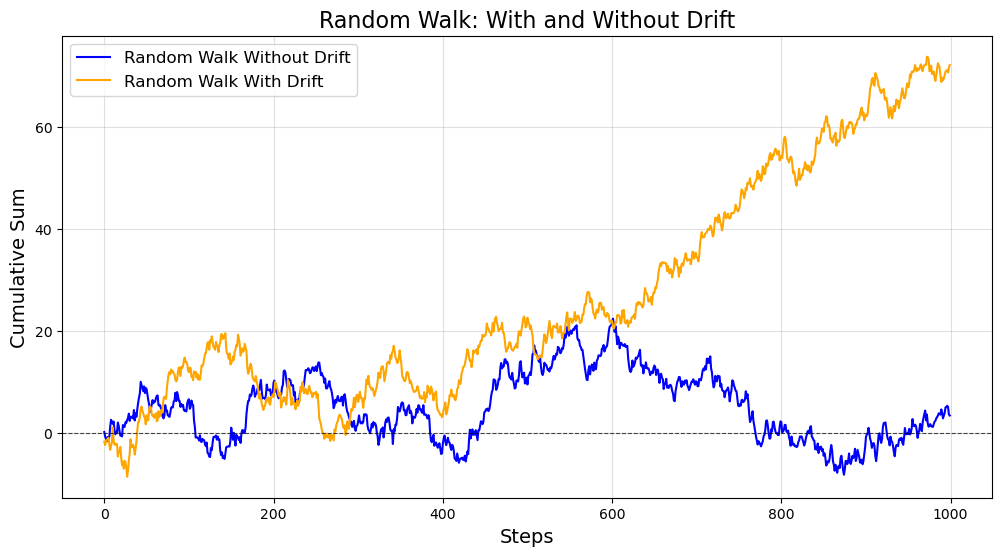

In [58]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(random_walk_without_drift, label="Random Walk Without Drift", color='blue')
plt.plot(random_walk_with_drift, label="Random Walk With Drift", color='orange')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)
plt.title("Random Walk: With and Without Drift", fontsize=16)
plt.xlabel("Steps", fontsize=14)
plt.ylabel("Cumulative Sum", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

## Testing for stationarity

In [64]:
from statsmodels.tsa.stattools import adfuller

ADF_result=adfuller(random_walk_with_drift)
ADF_result

(0.16158797777719333,
 0.9700229955664599,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 2791.710552170653)

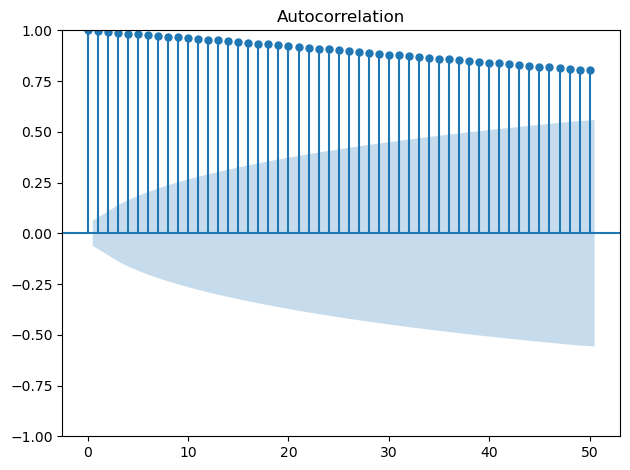

In [65]:
plot_acf(random_walk_with_drift, lags=50);

plt.tight_layout()

In [69]:
# Diff Series


In [71]:
diff_random_walk=np.diff(random_walk_with_drift,1)

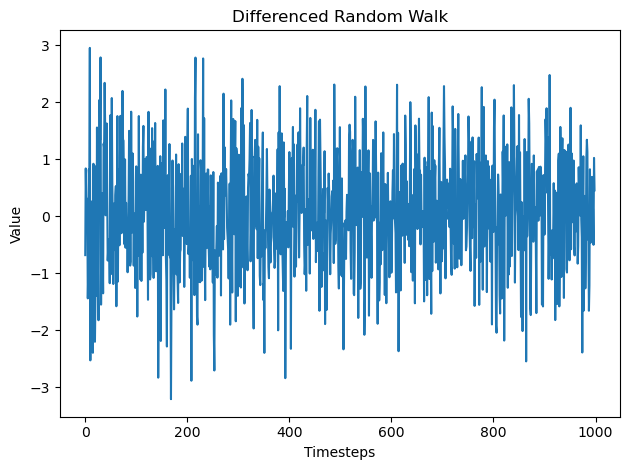

In [72]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

In [73]:
ADF_result=adfuller(diff_random_walk)
ADF_result

(-19.98460918490998,
 0.0,
 2,
 996,
 {'1%': -3.4369325637409154,
  '5%': -2.8644462162311934,
  '10%': -2.568317409920808},
 2785.2241754256293)

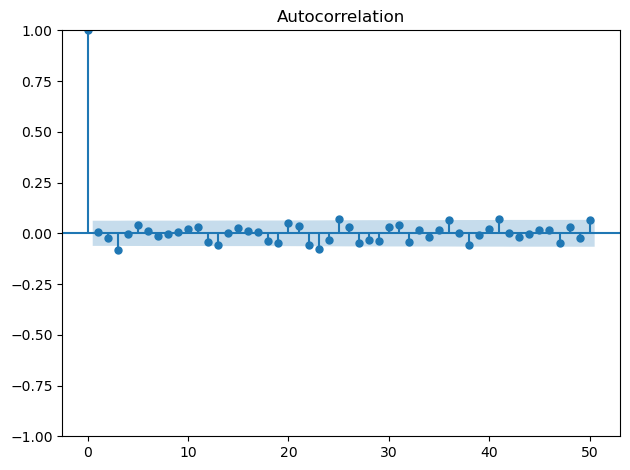

In [74]:
plot_acf(diff_random_walk, lags=50);

plt.tight_layout()